In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
df = pd.read_csv(r"/home/rahul/jupyter prt/chaitanya/adult.csv")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [5]:
# df.rename(columns={'39' : 'Age', ' 77516':  })
# Rename the columns
df.columns = ['Age', 'Workclass', 'Fnlwgt','Education','education_num',
              'marital_status','occupation','relationship','race','sex',
             'capital_gain','capital_loss','house_per_week','native_country'
              ,'income'
             ]

In [6]:
df

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  house_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df[df.dtypes[df.dtypes == 'object'].index]

,Workclass,Education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [9]:
str_colm = df.dtypes[df.dtypes == 'object'].index
str_colm

Index(['Workclass', 'Education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [10]:
# showing All Value in percentag 
# by using dropna=False couont tha nan value
for obj in str_colm:
    print(df[obj].value_counts(normalize=True,dropna=False)*100,)
    print('\n')
    print('\n')

 Private             69.705160
 Self-emp-not-inc     7.804054
 Local-gov            6.428133
 ?                    5.638821
 State-gov            3.983415
 Self-emp-inc         3.427518
 Federal-gov          2.948403
 Without-pay          0.042998
 Never-worked         0.021499
Name: Workclass, dtype: float64




 HS-grad         32.251229
 Some-college    22.392506
 Bachelors       16.443489
 Masters          5.291769
 Assoc-voc        4.244472
 11th             3.608722
 Assoc-acdm       3.277027
 10th             2.865479
 7th-8th          1.984029
 Prof-school      1.769042
 9th              1.578624
 12th             1.329853
 Doctorate        1.268428
 5th-6th          1.022727
 1st-4th          0.515971
 Preschool        0.156634
Name: Education, dtype: float64




 Married-civ-spouse       45.995086
 Never-married            32.807125
 Divorced                 13.645577
 Separated                 3.148034
 Widowed                   3.049754
 Married-spouse-absent     1.283784
 

In [11]:
# we can also use map
# value changing in target columns
df['income'].replace({' <=50K':0,' >50K':1} ,inplace=True)

In [12]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
# df[df.Workclass == ' ?'].fillna({' ?': np.NaN}, axis=0)
df.Workclass.replace(' ?', np.nan, inplace=True)

In [14]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
# df[df.Workclass == ' ?'].replace({' ?': np.NaN})
# df.replace({' ?': np.NaN})

In [16]:
# df.Workclass.tolist()
df.Workclass.unique()


array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
# df.interpolate(method='pad', limit_direction='forward', axis=0,inplace = True)
# df.interpolate(method="polynomial", order=1) not work
df.Workclass.interpolate(method ='pad', limit_direction='forward', axis=0, inplace = True)

In [18]:
# df["Workclass"].fillna(method = 'ffill', inplace = True)

In [19]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
house_per_week    0
native_country    0
income            0
dtype: int64

In [20]:
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
df.occupation.replace(' ?',np.NaN, inplace= True)

In [22]:
df.isnull().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
house_per_week       0
native_country       0
income               0
dtype: int64

In [23]:
df.interpolate(method='pad', limit_direction='forward', inplace = True)

In [24]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
house_per_week    0
native_country    0
income            0
dtype: int64

In [25]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
df.replace(' ?',np.NAN, inplace = True)

In [27]:
df.isnull().sum()

Age                 0
Workclass           0
Fnlwgt              0
Education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
house_per_week      0
native_country    583
income              0
dtype: int64

In [28]:
df.interpolate(method ='pad', limit_direction ='forward', inplace = True, order=2)

In [29]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
house_per_week    0
native_country    0
income            0
dtype: int64

<AxesSubplot:>

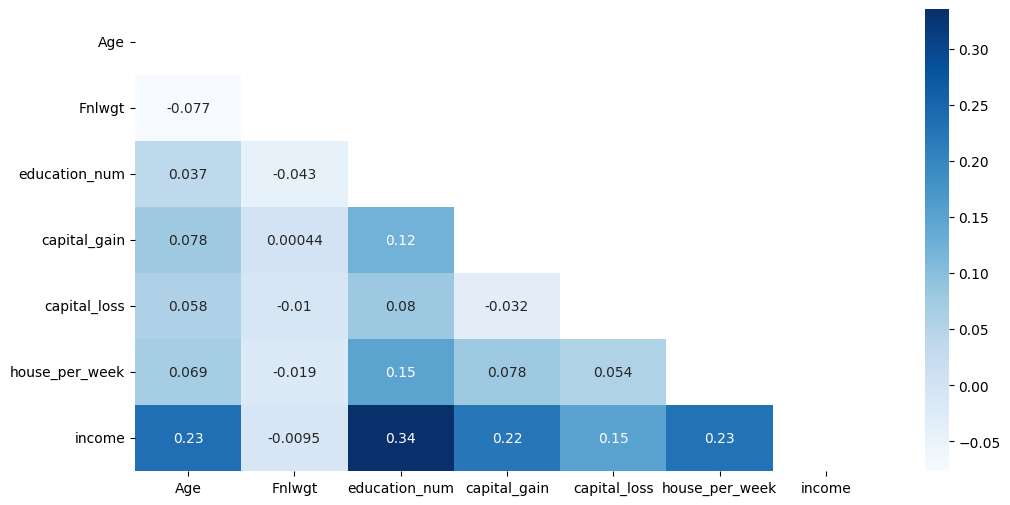

In [30]:
# Correlations
plt.figure(figsize=(12,6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

In [31]:
X  = df.drop('income',axis=1) 
y  = df[['income']]
X

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train, y_test = train_test_split(X, y , test_size=0.23, random_state=2529)

In [34]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((25071, 14), (7489, 14), (25071, 1), (7489, 1))

In [35]:
# X_train = pd.get_dummies(X_train , drop_first=True)
# X_test  = pd.get_dummies(X_test , drop_first=True)
# X_train

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
#ignore tells the encoder to ignore new categories by encoding them with 0's
ohe = OneHotEncoder(handle_unknown='ignore')

In [38]:
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)
X_train

<25071x18365 sparse matrix of type '<class 'numpy.float64'>'
	with 350994 stored elements in Compressed Sparse Row format>

In [39]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((25071, 18365), (7489, 18365), (25071, 1), (7489, 1))

In [40]:
# # But I was using inner join to have same no of columns in train and test set.
# train = pd.get_dummies(train)   # gives (1451, 221)  
# test = pd.get_dummies(test)    # gives (1459, 206)  
# final_train, final_test = train.align(test, join='inner', axis=1)  # inner join

In [41]:
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)
print(accuracy_score(y_test, prediction3))

/tmp/ipykernel_19427/1772274692.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


0.8517826145012686


In [44]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

Confusion Matrix:
 [[5354  340]
 [ 770 1025]]


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      5694
           1       0.75      0.57      0.65      1795

    accuracy                           0.85      7489
   macro avg       0.81      0.76      0.78      7489
weighted avg       0.84      0.85      0.84      7489



In [45]:
from xgboost import XGBClassifier

/home/rahul/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/rahul/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [46]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
y_pred_xgb=xgb_model.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
confusion_matrix(y_test,y_pred_xgb)

array([[5343,  351],
       [ 666, 1129]])

In [49]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5694
           1       0.76      0.63      0.69      1795

    accuracy                           0.86      7489
   macro avg       0.83      0.78      0.80      7489
weighted avg       0.86      0.86      0.86      7489



In [50]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


/home/rahul/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [51]:
y_pred_test = logreg.predict(X_test)

y_pred_test

print(accuracy_score(y_test, y_pred_test))

0.8675390572840166


In [52]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [53]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

print(accuracy_score(y_test, y_pred_gini))

0.8041126986246495


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

/home/rahul/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [56]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[4908  786]
 [ 793 1002]]


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5694
           1       0.56      0.56      0.56      1795

    accuracy                           0.79      7489
   macro avg       0.71      0.71      0.71      7489
weighted avg       0.79      0.79      0.79      7489



In [57]:
print(accuracy_score(y_test, prediction2))

0.7891574308986513


In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
